# Image Classification with Convolutional Neural Networks (CNN)

### Florian POSCENTE Rayane NADAUD Bastien HENRY

## 1 Data understanding and preparation
--------------------

## <p style = "color:#FF6347;"> Task 1 : Load the CIFAR-10 Dataset <p>

**Question 1**


cifar10.load_data() permitted to loads the CIFAR-10 dataset, which consists of 60,000 color images of size 32x32 pixels. There are 50,000 training images and 10,000 test images, divided into 10 different classes (e.g., airplanes, cars, birds, etc.)

In [1]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


**Question 2**

train_images.shape gives the dimensions of the training dataset :  50,000 images, size 32x32 pixels,3 color channels and test_images.she gives similar dimensions for the test set, which typically contains 10,000 images.


In [2]:
print(f'Training data shape: {train_images.shape}')
print(f'Test data shape: {test_images.shape}')


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


**Question 3**

The first dimension ( [0] ) represents the number of images. , so [1] and [2] is the height and width of each image.

In [3]:
print(f'Number of training samples: {train_images.shape[0]}')
print(f'Number of test samples: {test_images.shape[0]}')


Number of training samples: 50000
Number of test samples: 10000


**Question 4**

.shape: This gives the shape of the first image, which in CIFAR-10 will be (32, 32, 3), representing:32 pixels in height.32 pixels in width.3 channels for the color information (RGB).


In [4]:
print(f'Each image shape: {train_images[0].shape}')


Each image shape: (32, 32, 3)


## <p style = "color:#FF6347;"> Task 2 : Visualize the Dataset <p>

**Question 1**

In [5]:
import matplotlib.pyplot as plt
import numpy as np

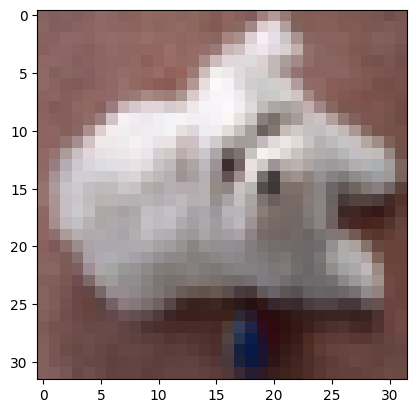

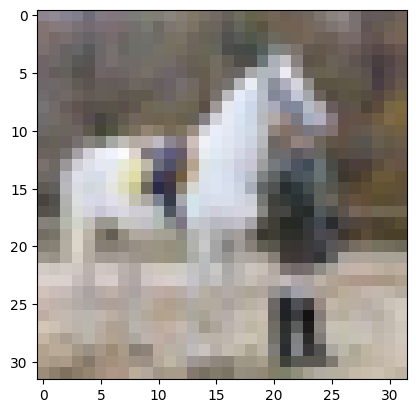

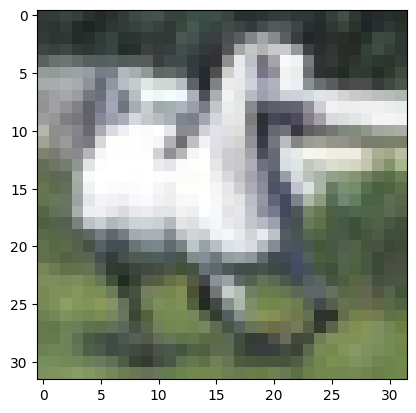

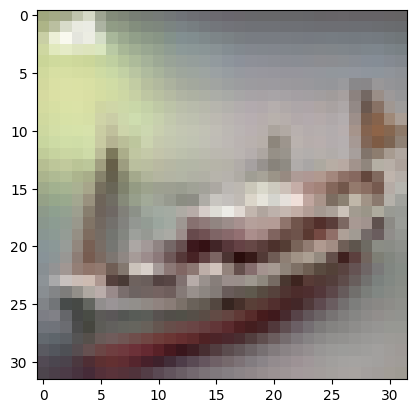

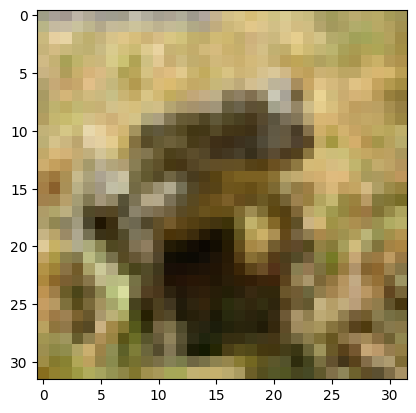

In [6]:
indices = np.random.randint(0, len(train_images), size=5)
for i in indices:
    plt.imshow(train_images[i])
    plt.show()

**Question 2**

In [7]:
print(f'Labels: {train_labels[indices]}')


Labels: [[5]
 [7]
 [7]
 [8]
 [6]]


**Question 3**

Images are really pixelized, a little bit difficult for human to analyze and classify it but it can be done whit a little effort. However a model well trained can do it whithout any problems

## <p style = "color:#FF6347;"> Task 3 : Normalize the Data <p>

In [8]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


Normalization speeds up convergence during training and stabilizes the learning process, as CNNs are sensitive to the scale of input data.

**question 3**

**question 4**

## <p style = "color:#FF6347;"> Task 4 : Apply One-Hot Encoding to the Labels <p>

In [9]:
from tensorflow.keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels, 10)
test_labels_one_hot = to_categorical(test_labels, 10)


**question 2**

**question 3**

## <p style = "color:#FF6347;"> Task 5 : Explore the Class Distribution <p>

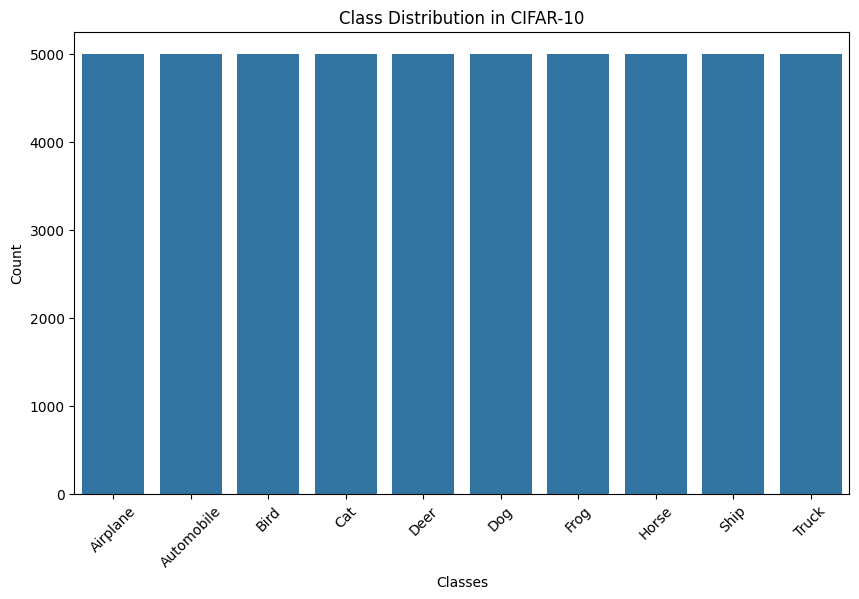

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


train_labels_flatten = train_labels.flatten()

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 6))
sns.countplot(x=train_labels_flatten)

plt.title('Class Distribution in CIFAR-10')
plt.xlabel('Classes')
plt.ylabel('Count')

plt.xticks(np.arange(10), class_names, rotation=45)

plt.show()


**question2**

**question 3**

##  2 Data Modeling
-------------------

### LeNet-5 Implementation

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Creating the model

In [12]:
def create_lenet5():
    model = Sequential()
    model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
 
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    
    model.add(Dense(10, activation='softmax'))
    
    return model


In [13]:
lenet5 = create_lenet5()
lenet5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\basti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### VGG BLOCK FUNCTION

In [14]:
from tensorflow.keras.layers import BatchNormalization, Dropout


In [15]:
def vgg_block():
    block = Sequential()
    block.add(Conv2D(filters= 32,kernel_size= (3, 3), activation='relu', padding='same'))
    block.add(Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', padding='same'))
    block.add(MaxPooling2D((2, 2)))
    return block

**VGG 1**

In [16]:
def create_vgg1():
    model = Sequential()
    model.add(vgg_block())  
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model

Compile VGG1

In [17]:
vgg1 = create_vgg1()
vgg1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**VGG 2**

In [18]:
def create_vgg2():
    model = Sequential()
    model.add(vgg_block())
    model.add(vgg_block())
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax')) 
    
    return model

Compile VGG2

In [19]:
vgg2 = create_vgg2()
vgg2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**VGG 3**

In [20]:
def create_vgg3():
    model = Sequential()
    model.add(vgg_block())
    model.add(vgg_block())
    model.add(vgg_block())
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model


Compile VGG 3

In [21]:
vgg3 = create_vgg3()
vgg3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training Model

Training LeNet-5

In [22]:
history_lenet5 = lenet5.fit(train_images, train_labels_one_hot, epochs=10, validation_data=(test_images, test_labels_one_hot))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3317 - loss: 1.8142 - val_accuracy: 0.4772 - val_loss: 1.4118
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5183 - loss: 1.3367 - val_accuracy: 0.5283 - val_loss: 1.3284
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5708 - loss: 1.2007 - val_accuracy: 0.5803 - val_loss: 1.1812
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5993 - loss: 1.1293 - val_accuracy: 0.5982 - val_loss: 1.1316
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6177 - loss: 1.0626 - val_accuracy: 0.5963 - val_loss: 1.1468
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6423 - loss: 1.0098 - val_accuracy: 0.6081 - val_loss: 1.1022
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6557 - loss: 0.9657 - val_accuracy: 0.6133 - val_loss: 1.1117
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6700 - loss: 0.9253 - 

Training VGG1

In [23]:
history_vgg1 = vgg1.fit(train_images, train_labels_one_hot, epochs= 10, validation_data=(test_images,test_labels_one_hot))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.4492 - loss: 1.5267 - val_accuracy: 0.6413 - val_loss: 1.0271
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6688 - loss: 0.9499 - val_accuracy: 0.6445 - val_loss: 1.0218
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7230 - loss: 0.7873 - val_accuracy: 0.6886 - val_loss: 0.8875
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7768 - loss: 0.6477 - val_accuracy: 0.6775 - val_loss: 0.9518
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.8162 - loss: 0.5235 - val_accuracy: 0.6917 - val_loss: 0.9258
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8607 - loss: 0.4128 - val_accuracy: 0.6891 - val_loss: 1.0045
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8913 - loss: 0.3207 - val_accuracy: 0.6709 - val_loss: 1.2753
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9201 -

Training VGG2

In [24]:
history_vgg2 = vgg2.fit(train_images, train_labels_one_hot, epochs= 10, validation_data=(test_images,test_labels_one_hot))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.4034 - loss: 1.6280 - val_accuracy: 0.6270 - val_loss: 1.0547
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6530 - loss: 0.9841 - val_accuracy: 0.6865 - val_loss: 0.8878
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7276 - loss: 0.7817 - val_accuracy: 0.7335 - val_loss: 0.7693
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7678 - loss: 0.6632 - val_accuracy: 0.7336 - val_loss: 0.7785
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8096 - loss: 0.5487 - val_accuracy: 0.7197 - val_loss: 0.8218
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8358 - loss: 0.4692 - val_accuracy: 0.7320 - val_loss: 0.8258
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8636 - loss: 0.3865 - val_accuracy: 0.7331 - val_loss: 0.8832
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.8869 -

In [34]:
history_vgg3 = vgg3.fit(train_images, train_labels_one_hot, epochs= 10, validation_data=(test_images,test_labels_one_hot))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.3208 - loss: 1.8003 - val_accuracy: 0.5723 - val_loss: 1.1922
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5949 - loss: 1.1339 - val_accuracy: 0.6451 - val_loss: 0.9925
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6705 - loss: 0.9299 - val_accuracy: 0.6622 - val_loss: 0.9866
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.7168 - loss: 0.8049 - val_accuracy: 0.7121 - val_loss: 0.8409
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7452 - loss: 0.7245 - val_accuracy: 0.7149 - val_loss: 0.8296
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7699 - loss: 0.6586 - val_accuracy: 0.7296 - val_loss: 0.8187
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7921 - loss: 0.5849 - val_accuracy: 0.7411 - val_loss: 0.7801
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8092 -

### Model Prediction

LeNet-5

In [25]:
import random

predictions_lenet5 = lenet5.predict(test_images)

predicted_classes_lenet5 = np.argmax(predictions_lenet5, axis=1)

random_indices = random.sample(range(test_images.shape[0]), 5)

for i in random_indices:
    print(f"Predicted: {predicted_classes_lenet5[i]}, Actual: {test_labels[i][0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted: 6, Actual: 6
Predicted: 9, Actual: 9
Predicted: 7, Actual: 3
Predicted: 2, Actual: 3
Predicted: 1, Actual: 1


In [26]:
test_loss_lenet5, test_accuracy_lenet5 = lenet5.evaluate(test_images, test_labels_one_hot)
print(f'Test accuracy of LeNet5: {test_accuracy_lenet5}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6246 - loss: 1.0798
Test accuracy of LeNet5: 0.6259999871253967


VGG1

In [27]:
predictions_VGG1 = vgg1.predict(test_images)

predicted_classes_VGG1 = np.argmax(predictions_VGG1, axis=1)

random_indices = random.sample(range(test_images.shape[0]), 5)

for i in random_indices:
    print(f"Predicted: {predicted_classes_VGG1[i]}, Actual: {test_labels[i][0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Predicted: 9, Actual: 9
Predicted: 7, Actual: 5
Predicted: 6, Actual: 6
Predicted: 0, Actual: 0
Predicted: 3, Actual: 5


In [28]:
test_loss_VGG1, test_accuracy_VGG1 = vgg1.evaluate(test_images, test_labels_one_hot)
print(f'Test accuracy of VGG1: {test_accuracy_VGG1}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6676 - loss: 1.6368
Test accuracy of VGG1: 0.6725000143051147


VGG2

In [29]:
predictions_VGG2 = vgg2.predict(test_images)

predicted_classes_VGG2 = np.argmax(predictions_VGG2, axis=1)

random_indices = random.sample(range(test_images.shape[0]), 5)

for i in random_indices:
    print(f"Predicted: {predicted_classes_VGG2[i]}, Actual: {test_labels[i][0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Predicted: 3, Actual: 5
Predicted: 9, Actual: 9
Predicted: 2, Actual: 2
Predicted: 6, Actual: 6
Predicted: 8, Actual: 8


In [37]:
test_loss_VGG2, test_accuracy_VGG2 = vgg2.evaluate(test_images, test_labels_one_hot)
print(f'Test accuracy of VGG3: {test_accuracy_VGG2}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7320 - loss: 1.1043
Test accuracy of VGG3: 0.7342000007629395


VGG3

In [35]:
predictions_VGG3 = vgg3.predict(test_images)

predicted_classes_VGG3 = np.argmax(predictions_VGG3, axis=1)

random_indices = random.sample(range(test_images.shape[0]), 5)

for i in random_indices:
    print(f"Predicted: {predicted_classes_VGG3[i]}, Actual: {test_labels[i][0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Predicted: 7, Actual: 7
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 6, Actual: 2
Predicted: 9, Actual: 9


In [38]:
test_loss_VGG3, test_accuracy_VGG3 = vgg3.evaluate(test_images, test_labels_one_hot)
print(f'Test accuracy of VGG3: {test_accuracy_VGG3}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7476 - loss: 0.7901
Test accuracy of VGG3: 0.7415000200271606


## Optimizer

1. What is an optimizer in the context of deep learning ?

In the context of deep learning, an optimizer represents a pivotal component that facilitates the calibration of a neural network's parameters during the training phase. Its principal objective is to minimize the model's error or loss function, thereby enhancing overall performance. A range of optimization algorithms, collectively referred to as optimizers, employ a variety of strategies to converge towards optimal parameter values, thereby facilitating more accurate predictions in an efficient manner.

2. Explain the role of an optimizer during the training of a neural network. How does it affect the learning
process ?

During the training phase, the optimizer is responsible for updating the model's weights with the objective of reducing the discrepancy between the predicted output and the actual target. The learning process is affected by the optimizer, which determines the rate at which the model converges to an optimal solution. The selection of an optimizer and its associated parameters (such as the learning rate) influence the rate of convergence, the stability of the learning process, and the likelihood of the model identifying a local or global minimum within the loss function.

3. What are the most common types of optimizers ?

The most common optimizers used in deep learning include:

    Stochastic Gradient Descent (SGD)

    SGD with Momentum

    RMSprop

    Adam (Adaptive Moment Estimation)

    AdaGrad (Adaptive Gradient Algorithm)

    AdaDelta

    AdamW

4. Compare how different optimizers (SGD, Adam, etc) update the model weights during training and how
this affects learning efficiency and speed.

SGD updates weights based on loss function gradient. It's simple but slow and may get stuck. It works well with large datasets, but you have to set the learning rate carefully.
SGD with momentum: Adds a term that remembers the previous update, which helps to speed up convergence and dampens oscillations.
Adam combines the advantages of AdaGrad and RMSprop. It makes the learning rate faster and more efficient than SGD. It uses both first and second moments of gradients, making the weight updates more robust.
RMSprop: Like AdaGrad, but it normalizes the gradients to prevent the learning rate from decaying too quickly.

5. How do the different optimizers perform with the VGG architecture ?

The VGG architecture is deep and consists of many layers, which makes training challenging in terms of time and convergence. Based on empirical evidence:

SGD: Works well with VGG but requires a lot of tuning of the learning rate and momentum. It often takes more epochs to converge to a good solution, making it slower.

Adam: Generally more efficient and faster at converging with VGG since it automatically adjusts learning rates. However, it may sometimes overfit or not generalize as well as SGD, depending on the task.

RMSprop: Performs similarly to Adam in terms of speed, but may not be as robust on very deep architectures like VGG when it comes to generalization.

In [33]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

### Testing different optimizer (SGD, ADAM(we already use it before) and RMSprop)

SGD

In [40]:
SGD_vgg3 = create_vgg3()

SGD_vgg3.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
history_sgd = SGD_vgg3.fit(train_images, train_labels_one_hot, validation_data=(test_images,test_labels_one_hot), epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.1704 - loss: 2.2052 - val_accuracy: 0.3542 - val_loss: 1.8097
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.3881 - loss: 1.7118 - val_accuracy: 0.4362 - val_loss: 1.6075
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4681 - loss: 1.4937 - val_accuracy: 0.4760 - val_loss: 1.4361
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5083 - loss: 1.3791 - val_accuracy: 0.5124 - val_loss: 1.3555
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5337 - loss: 1.2976 - val_accuracy: 0.5292 - val_loss: 1.3284
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5631 - loss: 1.2283 - val_accuracy: 0.4782 - val_loss: 1.4507
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5914 - loss: 1.1530 - val_accuracy: 0.5769 - val_loss: 1.1743
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.6142 -

In [ ]:
test_loss_SGD, test_accuracy_SGD = SGD_vgg3.evaluate(test_images, test_labels_one_hot)
print(f'Test accuracy of VGG3 whit SGD: {test_accuracy_SGD}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6891 - loss: 0.9325
Test accuracy of VGG3 whit SGD: 0.6818000078201294


ADAM

In [43]:
Adam_vgg3 = create_vgg3()

Adam_vgg3.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = Adam_vgg3.fit(train_images, train_labels_one_hot, validation_data=(test_images, test_labels_one_hot), epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.3405 - loss: 1.7743 - val_accuracy: 0.5728 - val_loss: 1.2078
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6002 - loss: 1.1169 - val_accuracy: 0.6532 - val_loss: 0.9889
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.6771 - loss: 0.9175 - val_accuracy: 0.6856 - val_loss: 0.9038
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.7207 - loss: 0.7954 - val_accuracy: 0.7074 - val_loss: 0.8446
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.7461 - loss: 0.7257 - val_accuracy: 0.7095 - val_loss: 0.8372
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7716 - loss: 0.6508 - val_accuracy: 0.7225 - val_loss: 0.8125
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7908 - loss: 0.5925 - val_accuracy: 0.7306 - val_loss: 0.7971
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.8050 -

In [44]:
test_loss_ADAM, test_accuracy_ADAM = Adam_vgg3.evaluate(test_images, test_labels_one_hot)
print(f'Test accuracy of VGG3 whit ADAM: {test_accuracy_ADAM}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7325 - loss: 1.1142
Test accuracy of VGG3 whit ADAM: 0.7303000092506409


RMSprop

In [45]:
RMSprop_vgg3 = create_vgg3()

RMSprop_vgg3.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
history_rmsprop = RMSprop_vgg3.fit(train_images, train_labels_one_hot, validation_data=(test_images, test_labels_one_hot), epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.3193 - loss: 1.8595 - val_accuracy: 0.5745 - val_loss: 1.2071
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5902 - loss: 1.1592 - val_accuracy: 0.6109 - val_loss: 1.1092
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6647 - loss: 0.9502 - val_accuracy: 0.6425 - val_loss: 1.0253
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7121 - loss: 0.8183 - val_accuracy: 0.6933 - val_loss: 0.8954
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7435 - loss: 0.7351 - val_accuracy: 0.6919 - val_loss: 0.9348
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7636 - loss: 0.6748 - val_accuracy: 0.7192 - val_loss: 0.8711
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7783 - loss: 0.6413 - val_accuracy: 0.7433 - val_loss: 0.7893
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7961 -

In [47]:
test_loss_RMSprop, test_accuracy_RMSprop = RMSprop_vgg3.evaluate(test_images, test_labels_one_hot)
print(f'Test accuracy of VGG3 whit RMSprop: {test_accuracy_RMSprop}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7207 - loss: 0.9754
Test accuracy of VGG3 whit RMSprop: 0.7181000113487244
